In [1483]:
import pandas as pd
import random 
import numpy as np
import matplotlib.pyplot as plt

Завдання 1.1

In [1484]:
n = 80
list_of_values = []
stat_mat = []
k = 12

for i in range (11):
	list_of_values.append(i+12)

for i in range(n):
	stat_mat.append(random.randint(k,k+10))

print(f"Статистичний матеріал на проміжку {k , k+10}: ")
print(stat_mat)


Статистичний матеріал на проміжку (12, 22): 
[21, 12, 14, 16, 16, 16, 18, 12, 21, 18, 15, 13, 12, 16, 16, 14, 19, 16, 22, 15, 20, 19, 13, 18, 16, 15, 17, 22, 20, 13, 20, 21, 12, 16, 17, 15, 19, 21, 14, 17, 19, 14, 16, 15, 15, 21, 21, 21, 19, 18, 17, 12, 18, 17, 16, 12, 18, 15, 13, 18, 22, 21, 17, 14, 15, 13, 22, 14, 20, 12, 14, 14, 13, 16, 19, 22, 14, 16, 14, 17]


In [1485]:
print(f"Варіацйний ряд: ")
stat_mat.sort()
print(stat_mat)

Варіацйний ряд: 
[12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 22, 22, 22, 22, 22]


In [1486]:
list_of_amount = []

for i in range(12,23):
	temp = []
	for j in stat_mat:
		if (j == i):
			temp.append(j)
	list_of_amount.append(len(temp))

columns = ['Values', 'Amount']

var_series = pd.DataFrame(columns=columns)
var_series['Values'] = list_of_values
var_series['Amount'] = list_of_amount
var_series = var_series.set_index('Values')

print('Частотна таблиця')
display(var_series.T)

Частотна таблиця


Values,12,13,14,15,16,17,18,19,20,21,22
Amount,7,6,10,8,12,7,7,6,4,8,5


<Axes: title={'center': 'Діаграма частот'}, xlabel='Values'>

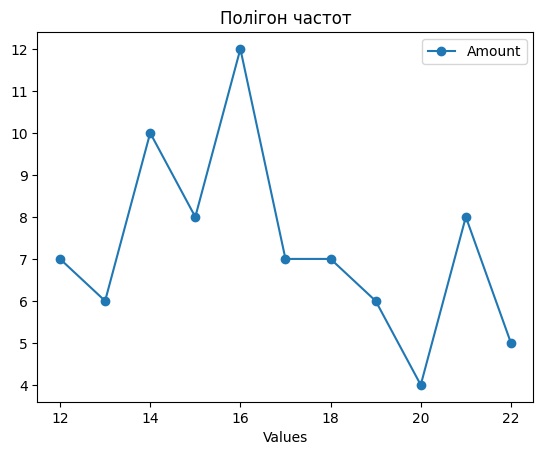

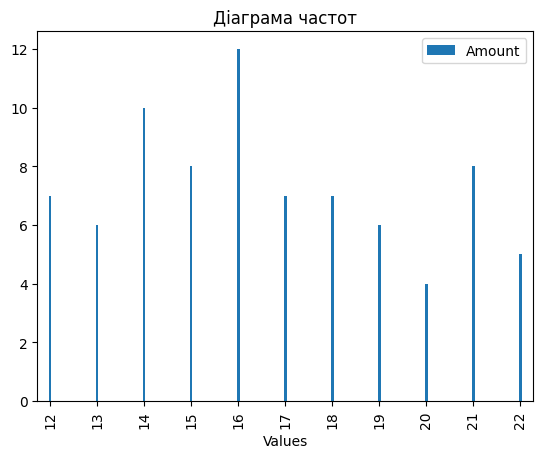

In [1487]:
var_series.plot(kind="line", style='-o' ,title="Полігон частот")
var_series.plot(kind="bar",title="Діаграма частот", width = 0.05)

In [1488]:
list_of_probabilities = []
temp = 0
for i in list_of_amount:
	temp += i
	list_of_probabilities.append(temp/n)

Values,x<12,12<=x<13,13<=x<14,14<=x<15,15<=x<16,16<=x<17,17<=x<18,18<=x<19,19<=x<20,20<=x<21,21<=x<22,x=22,x>22
Probability,0.0,0.0875,0.1625,0.2875,0.3875,0.5375,0.625,0.7125,0.7875,0.8375,0.9375,1.0,1.0


<Axes: title={'center': 'Eмпірична функція розподілу'}, xlabel='Values'>

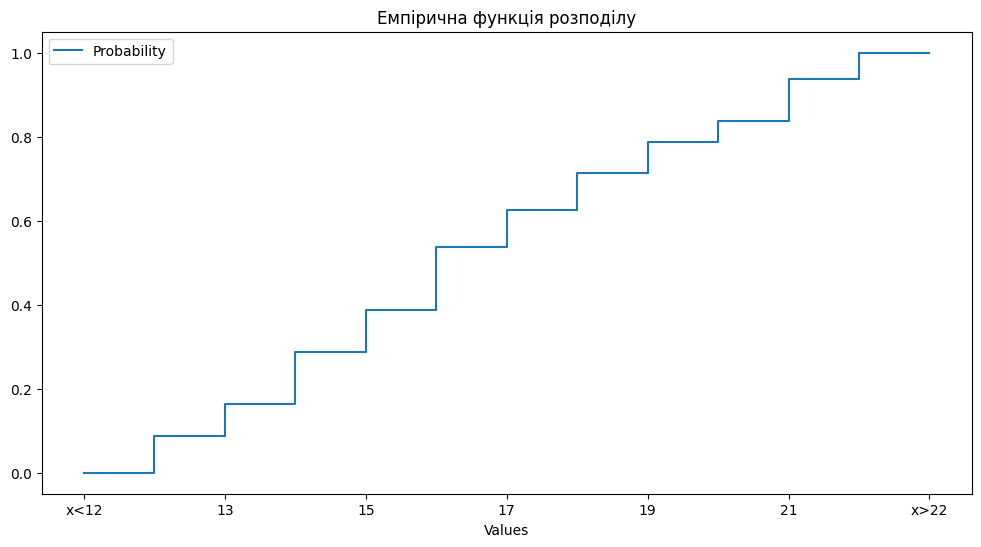

In [1489]:
displayed_list = ['x<12', '12<=x<13','13<=x<14','14<=x<15','15<=x<16','16<=x<17','17<=x<18','18<=x<19','19<=x<20','20<=x<21','21<=x<22','x=22','x>22']
list_of_emp_func_values = list_of_values.copy()
list_of_emp_func_prob = list_of_probabilities.copy()
columns = ['Values', 'Probability']
list_of_emp_func_values.append('x>22')
list_of_emp_func_values.insert(0,'x<12')
list_of_emp_func_prob.insert(0, 0)
list_of_emp_func_prob.append(1)
emp_func = pd.DataFrame(columns= columns)
emp_func["Values"] = list_of_emp_func_values
emp_func["Probability"] = list_of_emp_func_prob
emp_func = emp_func.set_index('Values')
df = pd.DataFrame(columns=columns)
df["Values"] = displayed_list
df["Probability"] = list_of_emp_func_prob
df = df.set_index("Values")
display(df.T)
emp_func.plot(drawstyle="steps-post", title="Eмпірична функція розподілу", figsize=(12,6))

In [1490]:
def moda(df):
	result = df["Amount"].idxmax()
	return result

In [1491]:
def mediana(list_val):
	if (len(list_val) % 2 == 0):
		first_id = int(len(list_val)/2)
		second_id = first_id + 1
		return (list_val[first_id] + list_val[second_id]) / 2
	else:
		return int(len(list_val)/2 + 1)

In [1492]:
def avg(list_val, list_am):
	sum = 0
	for i in range(len(list_val)):
		sum += list_val[i] * list_am[i]
	return sum/len(stat_mat)

In [1493]:
def deviation(list_val, list_am):
	sum = 0
	for i in range(len(list_val)):
		sum += ((list_val[i] - avg(list_val, list_am))**2) * list_am[i]
	return sum

In [1494]:
def dev_cube(list_val, list_am):
	sum = 0
	if len(list_val) == len(list_am):
		for i in range(len(list_val)):
			sum += ((list_val[i] - avg(list_val, list_am))**3) * list_am[i]
		return sum

In [1495]:
def dev_fourth(list_val, list_am):
	sum = 0
	for i in range(len(list_val)):
		sum += ((list_val[i] - avg(list_val, list_am))**4) * list_am[i]
	return sum

In [1496]:
def Q(stat_mat):
	first_Q = stat_mat[int(len(stat_mat)/4 - 1)]
	second_Q = stat_mat[int((2*len(stat_mat))/4 - 1)]
	third_Q = stat_mat[int((3*len(stat_mat)/4) - 1)]

	return first_Q, second_Q, third_Q

In [1497]:
variance = deviation(list_of_values,list_of_amount)/(len(stat_mat) - 1)
first_quartile, second_quartile, third_quartile = Q(stat_mat)
dispersion = deviation(list_of_values, list_of_amount) / len(stat_mat)

In [1498]:
print("Числові характеристики: ")
print(f"Мода:{moda(var_series)}")
print(f"Медіана:{mediana(stat_mat)}")
print(f"Середнє статистичне:{avg(list_of_values, list_of_amount)}")
print(f"Розмах:{list_of_values[10] - list_of_values[0]}")
print(f"Девіація:{deviation(list_of_values, list_of_amount)}")
print(f"Варіанса:{variance}")
print(f"Стандарт:{np.sqrt(variance)}")
print(f"Варіація:{np.sqrt(variance)/avg(list_of_values, list_of_amount)}")
print(f"Вибіркова дисперсія:{dispersion}")
print(f"Вибіркове середнє квадратичне відхилення:{np.sqrt(dispersion)}")
print(f"Квартиль:")
print(f"Перший квартиль:{first_quartile}")
print(f"Другий квартиль:{second_quartile}")
print(f"Третій квартиль:{third_quartile}")
print(f"Інтерквартильна широта:{third_quartile - first_quartile}")
print(f"Другий центральний момент:{dispersion}")
print(f"Третій центральний момент:{1/n * dev_cube(list_of_values, list_of_amount)}")
print(f"Четвертий центральний момент:{1/n * dev_fourth(list_of_values, list_of_amount)}")
print(f"Асиметрія:{1/n * dev_cube(list_of_values, list_of_amount) / np.sqrt(dispersion) ** 3}")
print(f"Ексцес:{1/n * dev_fourth(list_of_values, list_of_amount) / dispersion**2 - 3}")


Числові характеристики: 
Мода:16
Медіана:16.0
Середнє статистичне:16.6375
Розмах:10
Девіація:714.4875000000001
Варіанса:9.044145569620254
Стандарт:3.0073485946295375
Варіація:0.18075724084925845
Вибіркова дисперсія:8.93109375
Вибіркове середнє квадратичне відхилення:2.9884935586345174
Квартиль:
Перший квартиль:14
Другий квартиль:16
Третій квартиль:19
Інтерквартильна широта:5
Другий центральний момент:8.93109375
Третій центральний момент:5.947699218750017
Четвертий центральний момент:157.32778703613286
Асиметрія:0.2228394230664863
Ексцес:-1.0275948057637552


Завдання 1.2

Інтервальний розподіл варіанти


Values,"[12.0,13.428571428571429)","[13.428571428571429,14.857142857142858)","[14.857142857142858,16.285714285714285)","[16.285714285714285,17.714285714285715)","[17.714285714285715,19.142857142857142)","[19.142857142857142,20.57142857142857)","[20.57142857142857,22.0]"
Amount,13,10,20,7,13,4,13


<Axes: title={'center': 'Гістограма частот'}, xlabel='Values'>

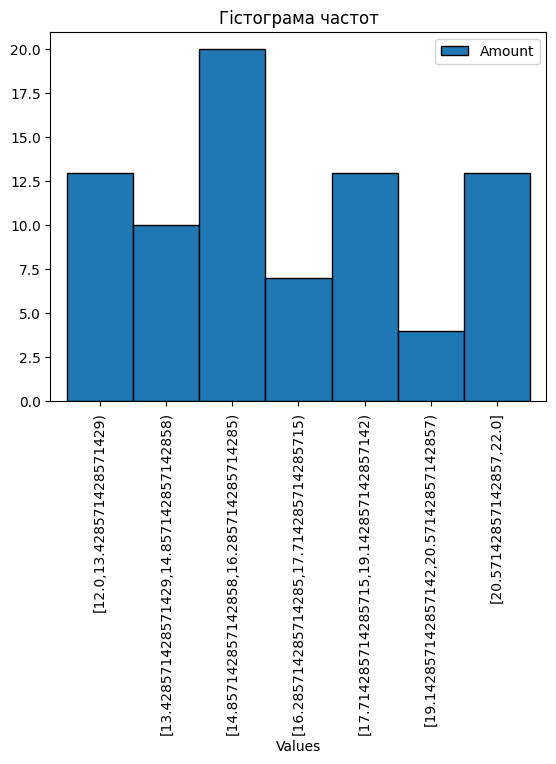

In [1499]:
number_of_intervals = 1 + int(np.log2(n))

values_list = np.linspace(12,22, num=number_of_intervals+1)

amount_list = []

for i in range (1,number_of_intervals+1):
	temp = []
	for j in stat_mat:
		if i == number_of_intervals: 
			if j >= values_list[i-1]:
				temp.append(j)
		else:
			if (j < values_list[i] and j >= values_list[i-1]):
				temp.append(j)
	amount_list.append(len(temp))

values = []
for i in range(1,len(values_list)):
	if  i == len(values_list) - 1:
		values.append(f"[{values_list[i-1]},{values_list[i]}]")
	else:
		values.append(f"[{values_list[i-1]},{values_list[i]})")

interval_data = pd.DataFrame()
interval_data['Values'] = values
interval_data['Amount'] = amount_list
interval_data = interval_data.set_index('Values')

print("Інтервальний розподіл варіанти")
display(interval_data.T)
interval_data.plot(kind = "bar", width = 1, edgecolor = "black", title = "Гістограма частот")

Values,x<12,"[12.0,13.428571428571429)","[13.428571428571429,14.857142857142858)","[14.857142857142858,16.285714285714285)","[16.285714285714285,17.714285714285715)","[17.714285714285715,19.142857142857142)","[19.142857142857142,20.57142857142857)","[20.57142857142857,22.0]",x>22
Probability,0.0,0.1625,0.2875,0.5375,0.625,0.7875,0.8375,1.0,1.0


<Axes: xlabel='Values'>

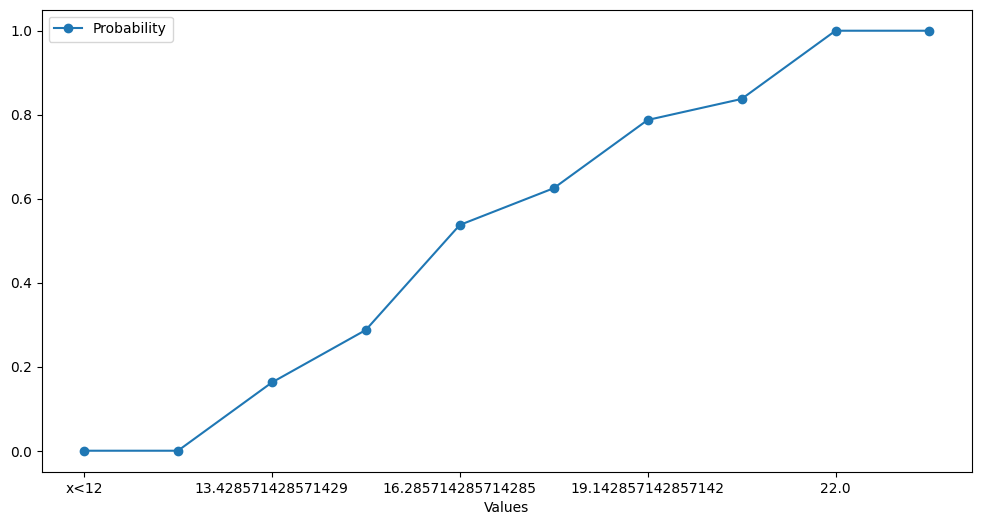

In [1500]:
prob_list = []
temp = 0
for i in amount_list:
	temp += i
	prob_list.append(temp/n)

prob_list.insert(0,0)
prob_list.insert(0,0)
prob_list.append(1)
v = list(values_list)
v.append('x>22')
v.insert(0, 'x<12')
emp_func = pd.DataFrame()
emp_func['Values'] = v
emp_func['Probability'] = prob_list
emp_func = emp_func.set_index('Values')
values.insert(0,'x<12')
values.append('x>22')
del prob_list[0]
df_display = pd.DataFrame()
df_display["Values"] = values
df_display["Probability"] = prob_list
df_display = df_display.set_index('Values')
display(df_display.T)
emp_func.plot(style = "-o", figsize=(12,6))


In [1501]:
h = (22 - 12)/number_of_intervals

In [1502]:
def mod(amount):
  temp = amount.index(max(amount_list))  
  f1 = amount[temp]  
  f0 = amount[temp - 1] if temp > 0 else 0
  f2 = amount[temp + 1] if temp < len(amount) - 1 else 0
  L = values_list[temp]  
  result = L + ((f1 - f0) * h) / ((f1 - f0) + (f1 - f2))
  return result

In [1503]:
def find_median_interval(amount):
    total = sum(amount)
    half_total = total / 2

    left_sum = 0 
    for i, a in enumerate(amount):
        left_sum += a
        if left_sum >= half_total:
            return i - 1

In [1504]:
def med(amount, value):
	temp = find_median_interval(amount)
	sum = 0
	for i in range(temp - 1):
		sum += amount[i]
	result = value[temp] + h/amount[temp] * (n / 2 - sum)
	return result

In [1505]:
def average(amount, values):
	current = values[0] + h/2
	i = 0
	sum = 0
	while (current <= values[7]):
		sum += current * amount[i]
		i += 1
		current += h
	res = sum / n
	return res

In [1506]:
def devN(values, amount):
	current = values[0] + h/2
	sum = 0
	i = 0
	while (current <= values[7]):
		sum += (current - average(amount, values))**2 * amount[i] 
		current += h
		i+=1
	return sum

In [1507]:
def dev3N(values, amount):
	current = values[0] + h/2
	sum = 0
	i = 0
	while (current <= values[7]):
		sum += (current - average(amount, values))**2 * amount[i] 
		current += h
		i+=1
	return sum

In [1508]:
def dev4N(values, amount):
	current = values[0] + h/2
	sum = 0
	i = 0
	while (current <= values[7]):
		sum += (current - average(amount, values))**2 * amount[i] 
		current += h
		i+=1
	return sum

In [1509]:
print("Числові характеристики: ")
print(f"Мода:{mod(amount_list)}")
print(f"Медіана:{med(amount_list, values_list)}")
print(f"Середнє статистичне:{average(amount_list, values_list)}")
print(f"Розмах:{values_list[7] - values_list[0]}")
print(f"Девіація:{devN(values_list, amount_list)}")
print(f"Варіанса:{devN(values_list, amount_list)/(n-1)}")
print(f"Стандарт:{np.sqrt(devN(values_list, amount_list)/(n-1))}")
print(f"Варіація:{np.sqrt(devN(values_list, amount_list)/(n-1)) / devN(values_list, amount_list)}")
print(f"Вибіркова дисперсія:{devN(values_list, amount_list) / n}")
print(f"Вибіркове середнє квадратичне відхилення:{np.sqrt(devN(values_list, amount_list) / n)}")
print(f"Другий центральний момент:{devN(values_list, amount_list) / n}")
print(f"Третій центральний момент:{1/n * dev3N(values_list, amount_list)}")
print(f"Четвертий центральний момент:{1/n * dev4N(values_list, amount_list)}")
print(f"Асиметрія:{1/n * dev3N(list_of_values, list_of_amount) / np.sqrt(dispersion) ** 3}")
print(f"Ексцес:{1/n * dev4N(list_of_values, list_of_amount) / dispersion**2 - 3}")


Числові характеристики: 
Мода:15.478260869565219
Медіана:19.142857142857142
Середнє статистичне:16.660714285714285
Розмах:10.0
Девіація:649.9744897959177
Варіанса:8.227525187290098
Стандарт:2.868366292384935
Варіація:0.00441304441545938
Вибіркова дисперсія:8.124681122448973
Вибіркове середнє квадратичне відхилення:2.850382627376362
Другий центральний момент:8.124681122448973
Третій центральний момент:8.124681122448973
Четвертий центральний момент:8.124681122448973
Асиметрія:1.1814714462395282
Ексцес:-2.6046598652267603


Завдання 1.3

In [1510]:
n = 80
list_of_values = []
stat_mat = []
k = 12

for i in range (11):
	list_of_values.append(i+12)

for i in range(n):
	stat_mat.append(random.uniform(k,k+10))

print(f"Статистичний матеріал на проміжку {k , k+10}: ")
print(stat_mat)

Статистичний матеріал на проміжку (12, 22): 
[16.586688556147777, 18.349284297667015, 15.37743516468742, 18.879111816126077, 14.65057238588267, 18.484328088080517, 19.5286646186741, 14.914746684154121, 19.481116690366214, 16.511497798341182, 18.60470414710515, 21.21379372435451, 21.869191969159658, 16.802323261855147, 18.192954004879446, 15.860206025033587, 17.351288846256992, 14.380078052116431, 13.344927050123065, 19.941106279782723, 12.223692140428165, 15.35077363998247, 13.020148013388487, 15.664968973401793, 14.06668960028787, 18.357481116926394, 14.916915377464047, 14.519920421892508, 12.074961980713228, 16.91898272177881, 12.494904345732706, 16.55063514108851, 15.153861979265603, 16.994477440929124, 21.651665310492014, 18.32517213181826, 14.697670185198742, 21.958439936313688, 13.65298477930228, 19.249791629326737, 17.812135211659168, 13.335689274042146, 14.871035280234063, 21.693357639511632, 21.68013669291706, 14.206434290192686, 14.211489113760882, 16.83160127615102, 20.47878

Інтервальний статистичний розподіл


Values,"[12.0,13.428571428571429)","[13.428571428571429,14.857142857142858)","[14.857142857142858,16.285714285714285)","[16.285714285714285,17.714285714285715)","[17.714285714285715,19.142857142857142)","[19.142857142857142,20.57142857142857)","[20.57142857142857,22.0]"
Amount,9,13,14,17,12,7,8


<Axes: title={'center': 'Гістограма частот'}, xlabel='Values'>

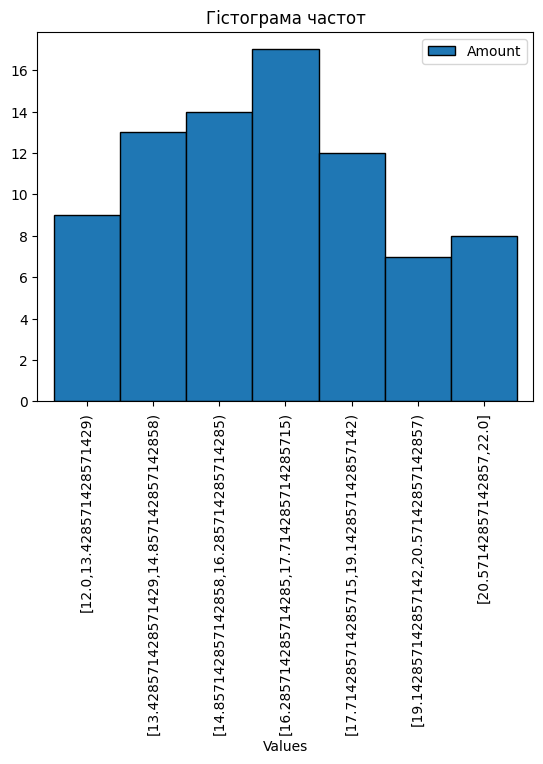

In [1511]:
number_of_intervals = 1 + int(np.log2(n))

values_list = np.linspace(12,22, num=number_of_intervals+1)

amount_list = []

for i in range (1,number_of_intervals+1):
	temp = []
	for j in stat_mat:
		if i == number_of_intervals: 
			if j >= values_list[i-1]:
				temp.append(j)
		else:
			if (j < values_list[i] and j >= values_list[i-1]):
				temp.append(j)
	amount_list.append(len(temp))

values = []
for i in range(1,len(values_list)):
	if  i == len(values_list) - 1:
		values.append(f"[{values_list[i-1]},{values_list[i]}]")
	else:
		values.append(f"[{values_list[i-1]},{values_list[i]})")

interval_data = pd.DataFrame()
interval_data['Values'] = values
interval_data['Amount'] = amount_list
interval_data = interval_data.set_index('Values')

print("Інтервальний статистичний розподіл")
display(interval_data.T)
interval_data.plot(kind = "bar", width = 1, edgecolor = "black", title = "Гістограма частот")

Values,x<12,"[12.0,13.428571428571429)","[13.428571428571429,14.857142857142858)","[14.857142857142858,16.285714285714285)","[16.285714285714285,17.714285714285715)","[17.714285714285715,19.142857142857142)","[19.142857142857142,20.57142857142857)","[20.57142857142857,22.0]",x>22
Probability,0.0,0.1125,0.275,0.45,0.6625,0.8125,0.9,1.0,1.0


<Axes: xlabel='Values'>

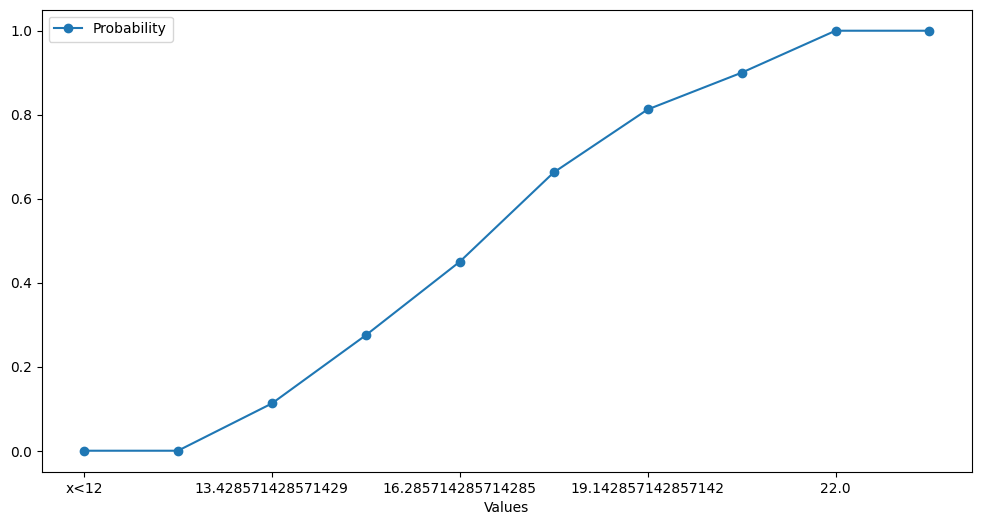

In [1512]:
prob_list = []
temp = 0
for i in amount_list:
	temp += i
	prob_list.append(temp/n)

prob_list.insert(0,0)
prob_list.insert(0,0)
prob_list.append(1)
v = list(values_list)
v.append('x>22')
v.insert(0, 'x<12')
emp_func = pd.DataFrame()
emp_func['Values'] = v
emp_func['Probability'] = prob_list
emp_func = emp_func.set_index('Values')
values.insert(0,'x<12')
values.append('x>22')
del prob_list[0]
df_display = pd.DataFrame()
df_display["Values"] = values
df_display["Probability"] = prob_list
df_display = df_display.set_index('Values')
display(df_display.T)
emp_func.plot(style = "-o", figsize=(12,6))

In [1513]:
print("Числові характеристики: ")
print(f"Мода:{mod(amount_list)}")
print(f"Медіана:{med(amount_list, values_list)}")
print(f"Середнє статистичне:{average(amount_list, values_list)}")
print(f"Розмах:{values_list[7] - values_list[0]}")
print(f"Девіація:{devN(values_list, amount_list)}")
print(f"Варіанса:{devN(values_list, amount_list)/(n-1)}")
print(f"Стандарт:{np.sqrt(devN(values_list, amount_list)/(n-1))}")
print(f"Варіація:{np.sqrt(devN(values_list, amount_list)/(n-1)) / devN(values_list, amount_list)}")
print(f"Вибіркова дисперсія:{devN(values_list, amount_list) / n}")
print(f"Вибіркове середнє квадратичне відхилення:{np.sqrt(devN(values_list, amount_list) / n)}")
print(f"Другий центральний момент:{devN(values_list, amount_list) / n}")
print(f"Третій центральний момент:{1/n * dev3N(values_list, amount_list)}")
print(f"Четвертий центральний момент:{1/n * dev4N(values_list, amount_list)}")
print(f"Асиметрія:{1/n * dev3N(list_of_values, list_of_amount) / np.sqrt(dispersion) ** 3}")
print(f"Ексцес:{1/n * dev4N(list_of_values, list_of_amount) / dispersion**2 - 3}")


Числові характеристики: 
Мода:16.82142857142857
Медіана:18.02040816326531
Середнє статистичне:16.69642857142857
Розмах:10.0
Девіація:521.1989795918363
Варіанса:6.5974554378713455
Стандарт:2.5685512332580296
Варіація:0.004928158599369333
Вибіркова дисперсія:6.514987244897954
Вибіркове середнє квадратичне відхилення:2.552447305018843
Другий центральний момент:6.514987244897954
Третій центральний момент:6.514987244897954
Четвертий центральний момент:6.514987244897954
Асиметрія:1.1814714462395282
Ексцес:-2.6046598652267603
